In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import matplotlib.pyplot as plt

In [50]:
DataFrame = pd.read_csv('https://raw.githubusercontent.com/Riddars/ITMO_Project_Cytotoxic/%D0%A7%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0/DF_with_actual_Decriptors.csv')


In [51]:
DataFrame.head()

,Cell type,test,material,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),CID,Canonical Smiles,...,hallKierAlpha,kappa1,kappa2,kappa3,Phi,organism,morphology,tissue,disease,BSL
0,0,9,1,4,200.0,36.126,24.6,-4.65,23985,9,...,0.74026,1.74026,0.091137,2.143769,0.158602,0,7,4,9,1
1,0,9,1,4,400.0,22.253,24.6,-33.33,23985,9,...,0.74026,1.74026,0.091137,2.143769,0.158602,0,7,4,9,1
2,0,9,1,4,500.0,19.643,24.6,-31.30,23985,9,...,0.74026,1.74026,0.091137,2.143769,0.158602,0,7,4,9,1
3,0,9,1,72,1.0,91.262,24.6,-16.95,23985,9,...,0.74026,1.74026,0.091137,2.143769,0.158602,0,7,4,9,1
4,0,9,1,72,3.0,87.500,24.6,29.45,23985,9,...,0.74026,1.74026,0.091137,2.143769,0.158602,0,7,4,9,1


In [52]:
def plot_predicted_vs_actual(y_test, y_pred):
    # Создание фигуры и осей
    fig, ax = plt.subplots()

    # Построение точечного графика с фактическими значениями по оси x
    ax.scatter(y_test, y_pred, color='red', label='Predicted', marker='o', s=30)
    ax.scatter(y_test, y_test, color='blue', label='Actual', marker='x', s=30)

    # Добавление линии идентичности (y = x)
    ax.plot(y_test, y_test, color='green', linestyle='--', label='Identity Line')

    # Настройка осей и легенды
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title('Scatter Plot of Predicted vs. Actual Values')
    ax.legend()

    # Оценка качества модели
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Среднеквадратичная ошибка (MSE):", mse)
    print("Коэффициент детерминации (R^2):", r2)

    # Отображение графика
    plt.show()

Random Forest

R-квадрат: 0.7016336357907935
MSE: 270.1298449342927
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
R-квадрат: 0.6874631286870977
MSE: 282.95929672825434
Среднеквадратичная ошибка (MSE): 282.95929672825434
Коэффициент детерминации (R^2): 0.6874631286870977


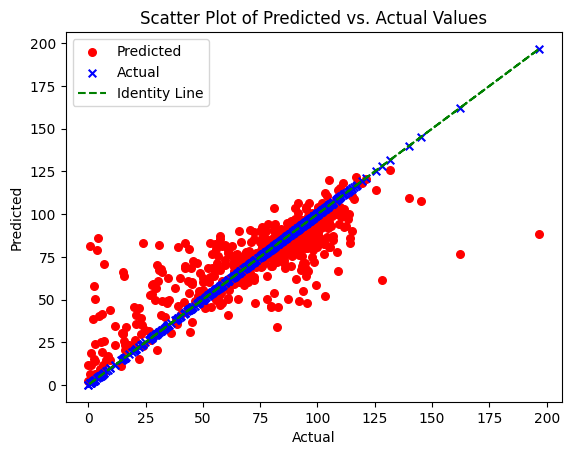

In [53]:
X = DataFrame.drop(['viability (%)'], axis=1)
y = DataFrame['viability (%)']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели
model = RandomForestRegressor()

# Обучение модели
model.fit(X_train, y_train)

# Оценка R-квадрат и MSE на тестовых данных
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Вывод значений R-квадрат и MSE
print('R-квадрат:', r2)
print('MSE:', mse)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],

}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                     min_samples_split=best_params['min_samples_split'],
                     max_depth=best_params['max_depth'],
                     )

# Обучение модели на обучающей выборке с оптимальными параметрами
model.fit(X_train, y_train)

# Предсказание на тестовой выборке с оптимальными параметрами
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Вывод значений R-квадрат и MSE
print('R-квадрат:', r2)
print('MSE:', mse)

plot_predicted_vs_actual(y_test, y_pred)

XGBRegressor

Среднеквадратичная ошибка (MSE): 235.30677390546367
Коэффициент детерминации (R^2): 0.7400967426570413
Среднеквадратичная ошибка (MSE): 235.30677390546367
Коэффициент детерминации (R^2): 0.7400967426570413


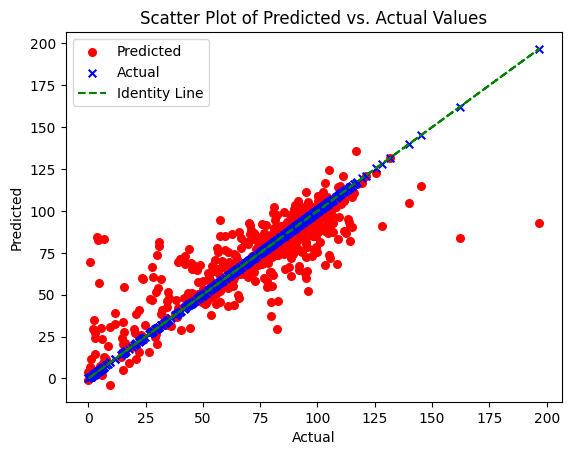

In [54]:
# Загрузите данные и разделите их на обучающий и тестовый наборы
X = DataFrame.drop('viability (%)', axis=1)
y = DataFrame['viability (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создайте и обучите модель XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Получите предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оцените качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)
plot_predicted_vs_actual(y_test, y_pred)

HistGradientBoostingRegressor

Среднеквадратичная ошибка (MSE): 272.7881660013883
Коэффициент детерминации (R^2): 0.6986974419323067
Среднеквадратичная ошибка (MSE): 272.7881660013883
Коэффициент детерминации (R^2): 0.6986974419323067


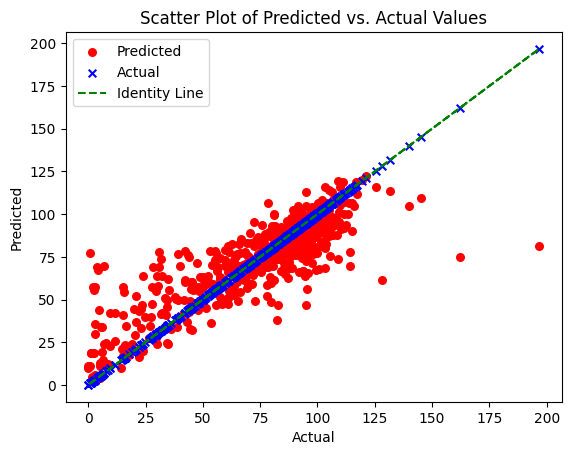

In [55]:
X = DataFrame.drop('viability (%)', axis=1)
y = DataFrame['viability (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создайте и обучите модель HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Получите предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оцените качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)
plot_predicted_vs_actual(y_test, y_pred)